# Evolution of Coronavirus disease 2019 (COVID-19) outbreak in Italy

source:
- [Official repository](https://github.com/pcm-dpc/COVID-19) with the italian **Protezione Civile**'s data.

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import rc
rc('font',size = 18)

import json

from urllib.request import urlretrieve

## Evolución a nivel nacional

In [2]:
url_national_data = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-andamento-nazionale.json'
national_data_JSON_file = 'dpc-covid19-ita-andamento-nazionale.json'
urlretrieve(url_national_data,national_data_JSON_file)

('dpc-covid19-ita-andamento-nazionale.json',
 <http.client.HTTPMessage at 0x7fc9a02f3710>)

In [3]:
national_DATA = pd.read_json(national_data_JSON_file)
national_DATA['data'] = [date.split()[0] for date in national_DATA['data']]
national_DATA

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24,ITA,101,26,127,94,221,221,1,7,229,4324
1,2020-02-25,ITA,114,35,150,162,311,90,1,10,322,8623
2,2020-02-26,ITA,128,36,164,221,385,74,3,12,400,9587
3,2020-02-27,ITA,248,56,304,284,588,203,45,17,650,12014
4,2020-02-28,ITA,345,64,409,412,821,233,46,21,888,15695
5,2020-02-29,ITA,401,105,506,543,1049,228,50,29,1128,18661
6,2020-03-01,ITA,639,140,779,798,1577,528,83,34,1694,21127
7,2020-03-02,ITA,742,166,908,927,1835,258,149,52,2036,23345
8,2020-03-03,ITA,1034,229,1263,1000,2263,428,160,79,2502,25856
9,2020-03-04,ITA,1346,295,1641,1065,2706,443,276,107,3089,29837


Text(0, 0.5, 'Casos')

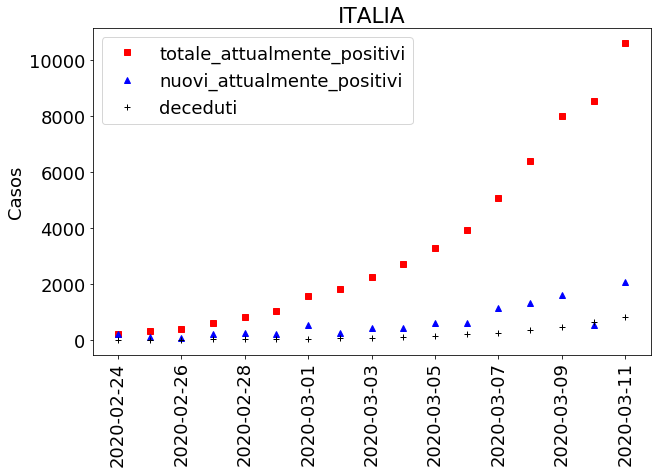

In [4]:
fig = national_DATA.plot.line(
    x='data'
    ,y=['totale_attualmente_positivi'
    ,'nuovi_attualmente_positivi','deceduti']
    ,rot=90
    ,style = ['sr','^b','+k']
    ,figsize = (10,6)
);
plt.title('ITALIA')
plt.xlabel('')
plt.ylabel('Casos')


## A nivel regional

In [5]:
url_regional_data = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-regioni.json'
regional_data_JSON_file = 'dpc-covid19-ita-regioni.json'
urlretrieve(url_regional_data,regional_data_JSON_file)

('dpc-covid19-ita-regioni.json', <http.client.HTTPMessage at 0x7fc97047a510>)

In [6]:
with open(regional_data_JSON_file) as f:
    json_str = f.read()
regions_DATA = json.loads(json_str)

#### Casos en Lazio

In [7]:
Lazio_DATA = []
for entry in regions_DATA:
    if entry['denominazione_regione'] == 'Lazio': Lazio_DATA.append(entry)
Lazio_DATA = pd.DataFrame(Lazio_DATA)
Lazio_DATA['data'] = [date.split()[0] for date in Lazio_DATA['data']]
Lazio_DATA

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24,ITA,12,Lazio,41.89277,12.483667,1,1,2,0,2,2,1,0,3,124
1,2020-02-25,ITA,12,Lazio,41.89277,12.483667,1,1,2,0,2,0,1,0,3,124
2,2020-02-26,ITA,12,Lazio,41.89277,12.483667,0,0,0,0,0,-2,3,0,3,124
3,2020-02-27,ITA,12,Lazio,41.89277,12.483667,0,0,0,0,0,0,3,0,3,552
4,2020-02-28,ITA,12,Lazio,41.89277,12.483667,0,0,0,0,0,0,3,0,3,611
5,2020-02-29,ITA,12,Lazio,41.89277,12.483667,3,0,3,0,3,3,3,0,6,679
6,2020-03-01,ITA,12,Lazio,41.89277,12.483667,3,0,3,0,3,0,3,0,6,724
7,2020-03-02,ITA,12,Lazio,41.89277,12.483667,3,0,3,1,4,1,3,0,7,773
8,2020-03-03,ITA,12,Lazio,41.89277,12.483667,10,0,10,1,11,7,3,0,14,877
9,2020-03-04,ITA,12,Lazio,41.89277,12.483667,15,3,18,9,27,16,3,0,30,995


Text(0, 0.5, 'Casos')

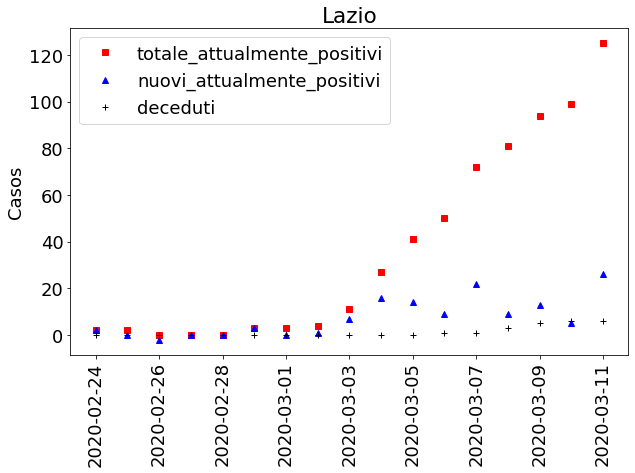

In [8]:
fig = Lazio_DATA.plot.line(
    x='data'
    ,y=['totale_attualmente_positivi'
    ,'nuovi_attualmente_positivi','deceduti']
    ,rot=90
    ,style = ['sr','^b','+k']
    ,figsize = (10,6)
);
plt.title('Lazio')
plt.xlabel('')
plt.ylabel('Casos')

## A nivel provincial 

In [100]:
url_province_data = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-province.json'
province_data_JSON_file = 'dpc-covid19-ita-province.json'
urlretrieve(url_province_data,province_data_JSON_file)

('dpc-covid19-ita-province.json', <http.client.HTTPMessage at 0x7ff130b06d10>)

In [101]:
with open(province_data_JSON_file) as f:
    json_str = f.read()
provinces_DATA = json.loads(json_str)

#### Casos en Roma

In [102]:
Roma_DATA = []
for entry in provinces_DATA:
    if entry['denominazione_provincia'] == 'Roma': Roma_DATA.append(entry)
Roma_DATA = pd.DataFrame(Roma_DATA)
Roma_DATA['data'] = [date.split()[0] for date in Roma_DATA['data']]
Roma_DATA

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
0,2020-02-24,ITA,12,Lazio,58,Roma,RM,41.89277,12.483667,0
1,2020-02-25,ITA,12,Lazio,58,Roma,RM,41.89277,12.483667,3
2,2020-02-26,ITA,12,Lazio,58,Roma,RM,41.89277,12.483667,3
3,2020-02-27,ITA,12,Lazio,58,Roma,RM,41.89277,12.483667,3
4,2020-02-28,ITA,12,Lazio,58,Roma,RM,41.89277,12.483667,3
5,2020-02-29,ITA,12,Lazio,58,Roma,RM,41.89277,12.483667,6
6,2020-03-01,ITA,12,Lazio,58,Roma,RM,41.89277,12.483667,6
7,2020-03-02,ITA,12,Lazio,58,Roma,RM,41.89277,12.483667,7
8,2020-03-03,ITA,12,Lazio,58,Roma,RM,41.89277,12.483667,14
9,2020-03-04,ITA,12,Lazio,58,Roma,RM,41.89277,12.483667,29


Text(0, 0.5, 'Casos')

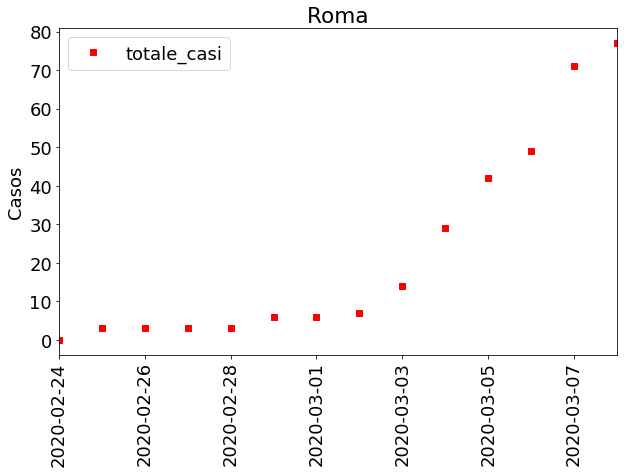

In [103]:
fig = Roma_DATA.plot.line(
    x='data'
    ,y=['totale_casi']
    ,rot=90
    ,style = ['sr']
    ,figsize= (10,6)
);
plt.title('Roma')
plt.xlabel('')
plt.ylabel('Casos')